In [1]:
import yfinance as yahooFinance
import pandas as pd
import datetime

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy
 
startDate = datetime.datetime(2006, 2, 6) # modifying this from 1,1,06 to 2,6,06
endDate = datetime.datetime(2020, 12, 31)

vti = yahooFinance.Ticker("VTI").history(start=startDate,end=endDate).reset_index()
agg = yahooFinance.Ticker("AGG").history(start=startDate,end=endDate).reset_index()
dbc = yahooFinance.Ticker("DBC").history(start=startDate,end=endDate).reset_index()
vix = yahooFinance.Ticker("^VIX").history(start=startDate,end=endDate).reset_index()
 
all_assets = [vti, agg, dbc, vix]
labels = ["vti", "agg","dbc","vix"]

# look at dividends, capital gains

/Users/samuelmeisner/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
for i, asset in enumerate(all_assets):
    asset = asset.reset_index()
    asset['Returns'] = (asset['Close']-asset['Open'])/asset['Open']
    asset['Date'] = asset['Date'].dt.date
    all_assets[i] = asset

In [3]:
returns = pd.DataFrame()
returns['Date'] = all_assets[0]['Date']
for i, l in enumerate(labels):
    returns[l] = all_assets[i]['Close']
    returns[l + '_return'] = all_assets[i]['Returns']

In [4]:
returns

,Date,vti,vti_return,agg,agg_return,dbc,dbc_return,vix,vix_return
0,2006-02-06,45.108860,0.001903,57.877342,0.001399,20.889500,-0.014257,13.040000,-0.029039
1,2006-02-07,44.669655,-0.007143,57.836937,-0.001894,20.285257,-0.022869,13.590000,0.029545
2,2006-02-08,44.991013,0.006068,57.808075,-0.000998,20.198936,-0.003831,12.830000,-0.043251
3,2006-02-09,44.905331,-0.004670,57.842724,0.000200,20.388840,0.002547,13.120000,0.044586
4,2006-02-10,44.998158,0.002865,57.721378,-0.001997,20.017662,-0.019450,12.870000,-0.035955
...,...,...,...,...,...,...,...,...,...
3747,2020-12-23,184.022537,-0.001911,109.330170,0.000594,13.794738,0.006220,23.309999,-0.007663
3748,2020-12-24,184.330353,-0.000311,109.432182,0.000424,13.832635,0.004818,21.530001,-0.041833
3749,2020-12-28,185.496643,-0.002826,109.450714,0.000339,13.747366,-0.005483,21.700001,-0.018544
3750,2020-12-29,184.722305,-0.008365,109.469254,-0.000254,13.785263,0.001376,23.080000,0.068024


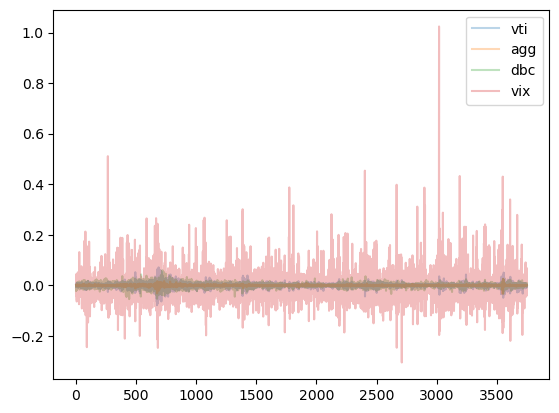

In [15]:
import matplotlib.pyplot as plt
plt.plot(returns['vti_return'],label="vti", alpha=0.3)
plt.plot(returns['agg_return'],label="agg", alpha=0.3)
plt.plot(returns['dbc_return'],label="dbc", alpha=0.3)
plt.plot(returns['vix_return'],label="vix", alpha=0.3)
plt.legend()
plt.show()

In [5]:
#returns.to_csv("returns.csv")

In [8]:
window = 50  

# Function to create sequence with lookback
def create_sequence(data, lookback):
    X = []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
    return np.array(X)

# Create sequences with the lookback window
X = create_sequence(returns.drop(columns=["Date"]), window)

# Splitting data into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]

In [ ]:
def sharpe_ratio(returns_data_lb, historical weights

In [11]:
# Define the neural network model
model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),  # Flatten the input
    Dense(64, activation='relu'),
    Dense(4),  # Output layer without activation for custom loss calculation
    Softmax()  # Softmax layer for classification
])

model.compile(optimizer='adam', loss=sharpe_ratio)

In [ ]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        loss = model.train_on_batch(X_batch)  
    print(f"Training loss: {loss}")

# Evaluate the model
loss = model.evaluate(X_test) 
print("Test Loss:", loss)